In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import re
from IPython.display import display
pd.options.display.max_rows=None
from scipy import stats
from statsmodels.formula.api import ols 
from IPython.display import display, Markdown
%matplotlib inline

In [6]:
playstore=pd.read_csv(r"C:\Users\andee\googleplaystore.csv")

In [8]:
#Checking out the info, datatype, number of rows, columns
playstore.info()
playstore.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [9]:
playstore.drop(index=10472,inplace=True)


In [72]:
def change_size(size):
    kb= size.str.endswith("k")
    MB=  size.str.endswith("M")
    other= ~(kb|MB)
    size.loc[kb]= size[kb].str.replace("k","").astype("float")/1024
    size.loc[MB]= size[MB].str.replace("M","").astype("float")
    size.loc[other] = float(0.0)
change_size(playstore.Size)
playstore.columns= [x.replace(" ","_") for x in  playstore.columns]
playstore.Installs= np.log(playstore.Installs.str.replace("[+,]","").astype("int64")+1)
playstore.Reviews= np.log(playstore.Reviews.astype("int")+1)
playstore.Price= playstore.Price.str.replace("[$,]","").astype("float")
playstore.Size=playstore.Size.astype("float")
#playstore.Type= pd.get_dummies(playstore.Type,drop_first=True)

AttributeError: Can only use .str accessor with string values, which use np.object_ dtype in pandas

In [74]:
playstore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
App               10829 non-null object
Category          10829 non-null object
Rating            10829 non-null float64
Reviews           10829 non-null float64
Size              10829 non-null float64
Installs          10829 non-null float64
Type              10829 non-null object
Price             10829 non-null float64
Content_Rating    10829 non-null object
Genres            10829 non-null object
Last_Updated      10829 non-null object
Current_Ver       10829 non-null object
Android_Ver       10829 non-null object
dtypes: float64(5), object(8)
memory usage: 1.5+ MB


In [12]:
#Dealing with Null Values

In [19]:
total = playstore.isnull().sum().sort_values(ascending=False)
percent = (playstore.isnull().sum()/playstore.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
display(missing_data.head(6))
print("Before Cleaning")
display(playstore.shape)

,Total,Percent
Android_Ver,0,0.0
Current_Ver,0,0.0
Last_Updated,0,0.0
Genres,0,0.0
Content_Rating,0,0.0
Price,0,0.0


Before Cleaning


(10829, 13)

In [20]:
playstore.Rating.fillna(method='ffill',inplace=True)
playstore.dropna(how ='any', inplace = True)
print("After Cleaning")
playstore.shape

After Cleaning


(10829, 13)

C:\Users\andee\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\andee\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\andee\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\andee\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


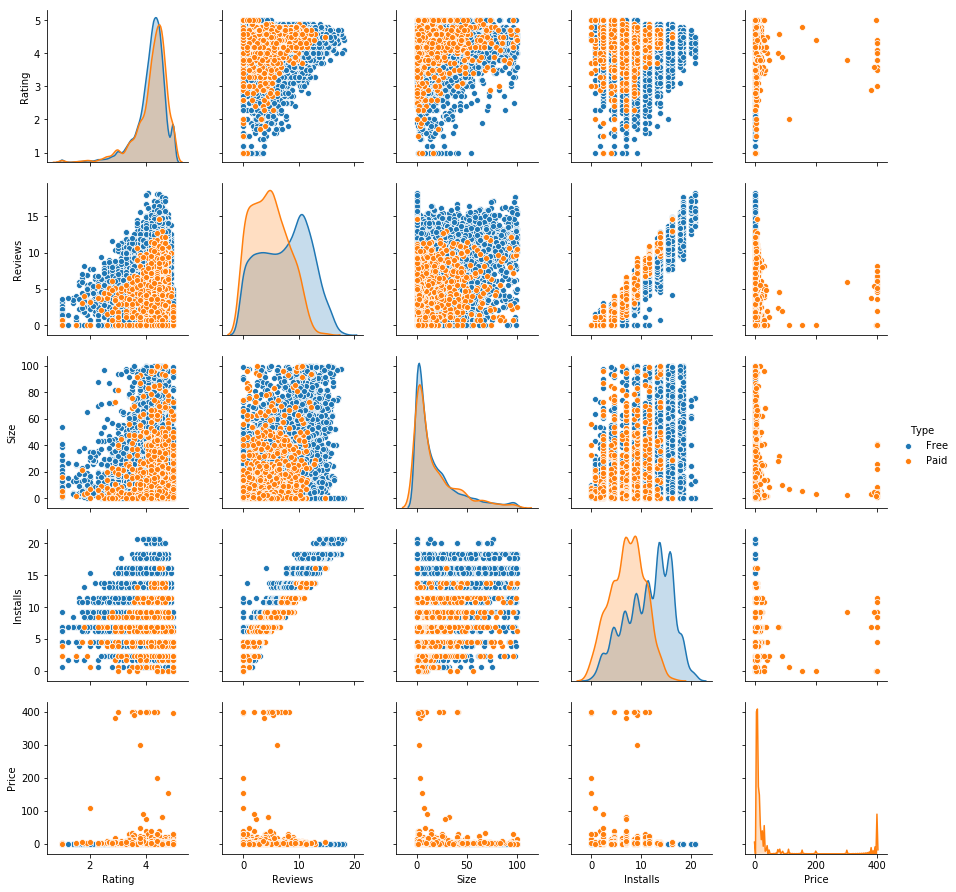

In [21]:
sns.pairplot(playstore,kind="scatter",hue='Type')

1- Most of the rating are on or above 4.

2- Rating and reiveiws have a positive correlation

3- Free apps reviews are more spread then paid apps revies.

4- Reviews and Installs have a strong correlation.

5- Instalation is almost normaly destributed for both paid and free app

6- most of the app size is below 50 MB


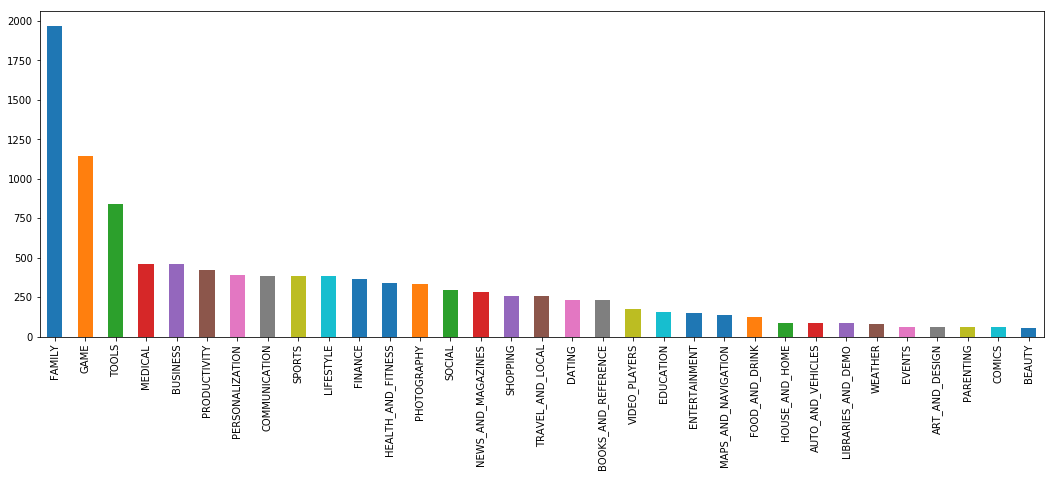

In [22]:
playstore.Category.value_counts().plot(kind='bar',figsize=(18,6))

By category destribution we can see that most of the app are from top 3 category.

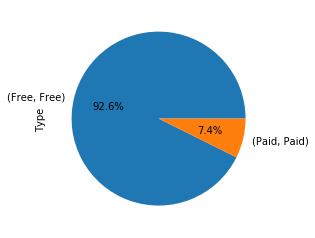

In [24]:
playstore.groupby("Type")["Type"].value_counts().plot(kind='pie',autopct='%1.1f%%' );

Only about 7% app are paid App.

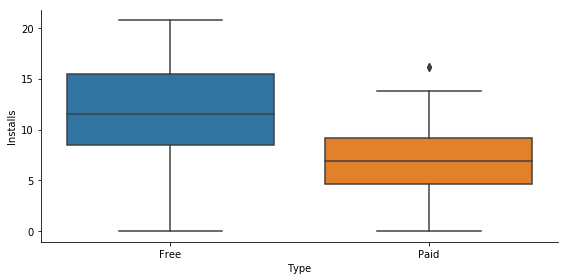

In [25]:
sns.catplot(x="Type",y="Installs",kind='box',data=playstore,  height=4, aspect=2/1);

Here I found that Free apps are way more downloaded than paid apps.

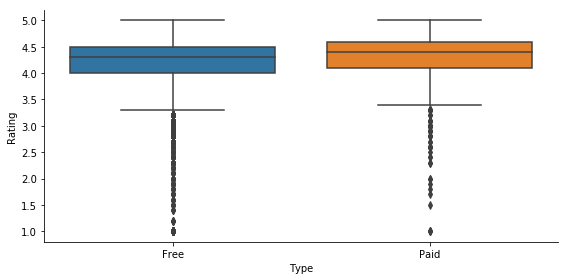

In [26]:
sns.catplot(x="Type",y="Rating",kind='box',data=playstore,  height=4, aspect=2/1);

Here Paid apps have better rating than free apps.

Q.Are paid have significantly better rating than free apps?

In [27]:
#null Hypothisis- avg rating are same for paid and free app
model_name = ols('Rating ~ C(Type)', data=playstore).fit()
model_name.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     6.417
Date:                Mon, 25 Feb 2019   Prob (F-statistic):             0.0113
Time:                        11:35:08   Log-Likelihood:                -8816.4
No. Observations:               10829   AIC:                         1.764e+04
Df Residuals:                   10827   BIC:                         1.765e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           4.1881      0.005    767.943      0.000       4.177       4.199
C(Type)[T.Paid]     0.0509      0.020      2.533      0.011       0.012       0.090
==============================================================================
Omnibus:                     4330.970   Durbin-Watson:                   1.355
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22634.907
Skew:                          -1.872   Prob(JB):                         0.00
Kurtosis:                       9.012   Cond. No.                         3.85
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here Paid app have significantly higher rating than free app.

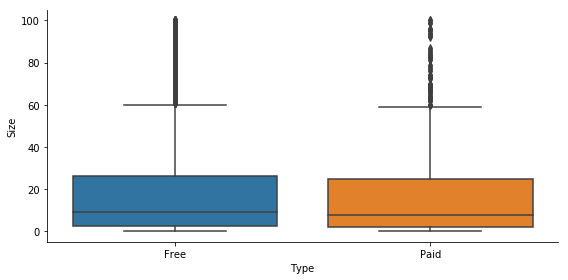

In [28]:
sns.catplot(x="Type",y="Size",kind='box',data=playstore, height=4, aspect=2/1);


Size are almost same for the paid and free app.

### Price of the apps

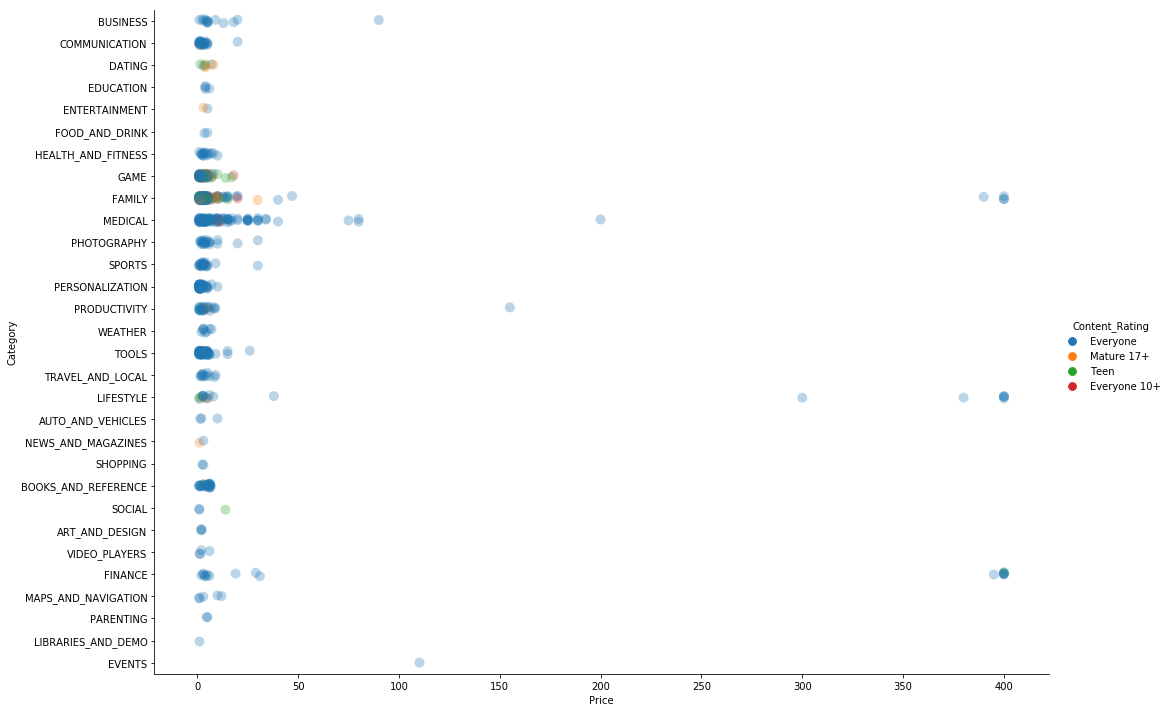

In [29]:
sns.catplot("Price","Category",data=playstore[playstore.Price>0],height=10,aspect=1.5,hue="Content_Rating",s=10,alpha=.3);

Lets look into high price app



In [30]:
playstore[playstore.Price>200][["Category","App","Price"]]

,Category,App,Price
4197,FAMILY,most expensive app (H),399.99
4362,LIFESTYLE,💎 I'm rich,399.99
4367,LIFESTYLE,I'm Rich - Trump Edition,400.00
5351,LIFESTYLE,I am rich,399.99
5354,FAMILY,I am Rich Plus,399.99
5355,LIFESTYLE,I am rich VIP,299.99
5356,FINANCE,I Am Rich Premium,399.99
5357,LIFESTYLE,I am extremely Rich,379.99
5358,FINANCE,I am Rich!,399.99
5359,FINANCE,I am rich(premium),399.99


They all look junk app, lets remove them and plot the graph again



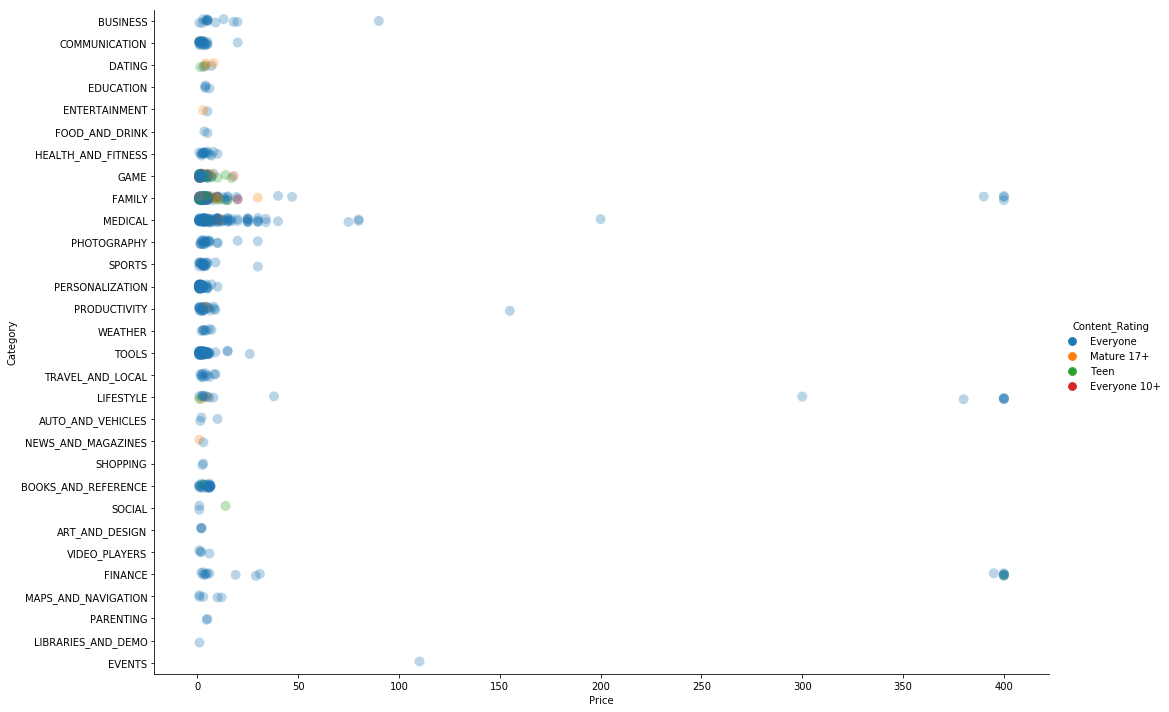

In [31]:
sns.catplot("Price","Category",data=playstore[playstore.Price>0],height=10,aspect=1.5,hue="Content_Rating",s=10,alpha=.3)

Here we found

1-Most of the app are priced well below $50.

2-Most of the paid are from family, Medical and games category.

### Paid apps Content Rating


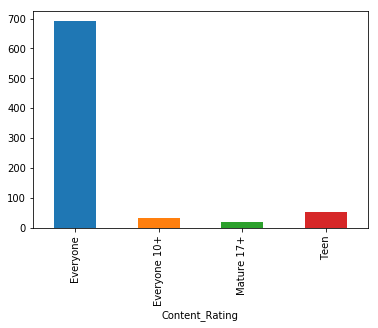

In [33]:
playstore[playstore.Price>0].groupby("Content_Rating")["App"].count().plot(kind='bar')


Most of the paid are for everyone's use, With some of the app focused on teen.

## EDA for category and Genres
### Size of app

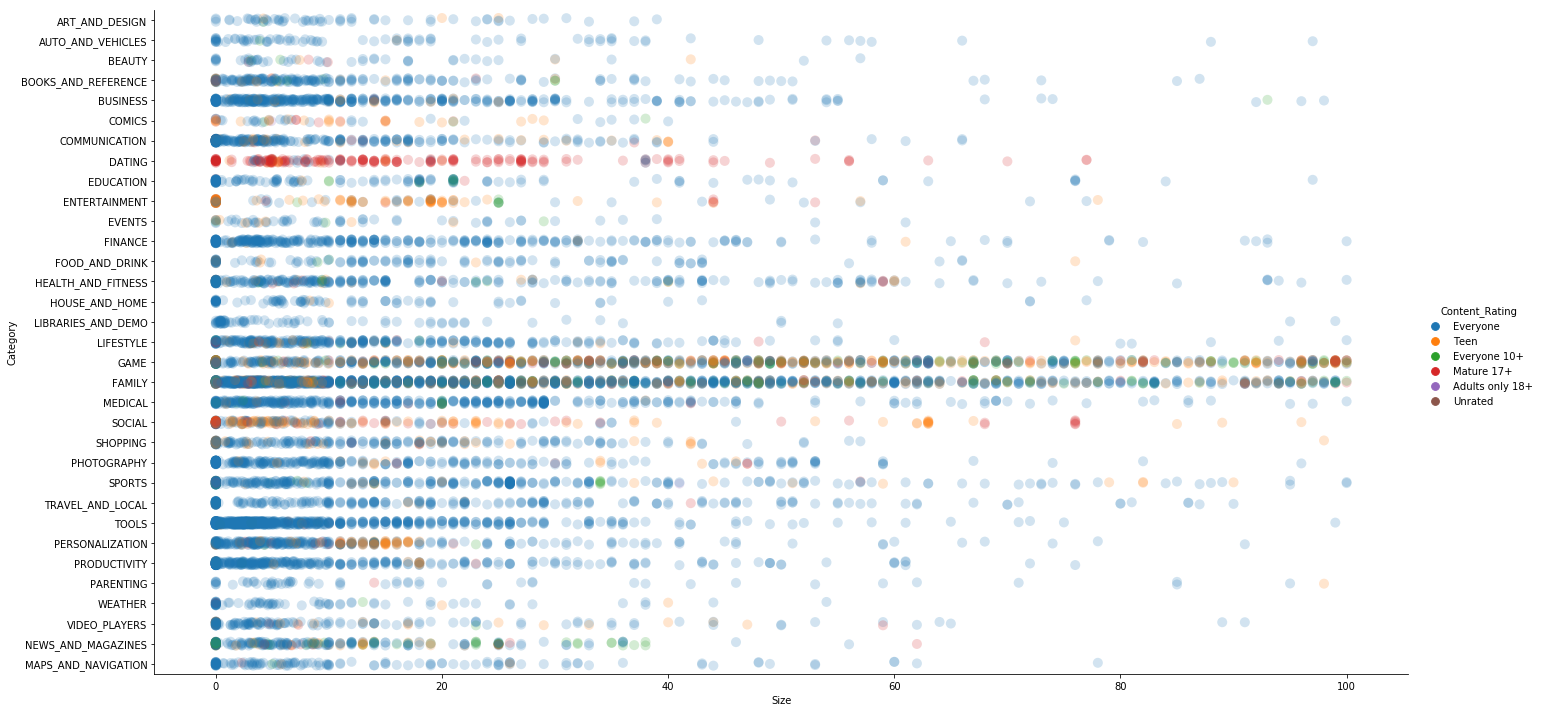

In [34]:
sns.catplot("Size","Category",data=playstore,height=10,aspect=2/1,c=1/1000,s=10,alpha=0.2,hue="Content_Rating")

Most of the large size app are form Family and Game category


### Rating by Category


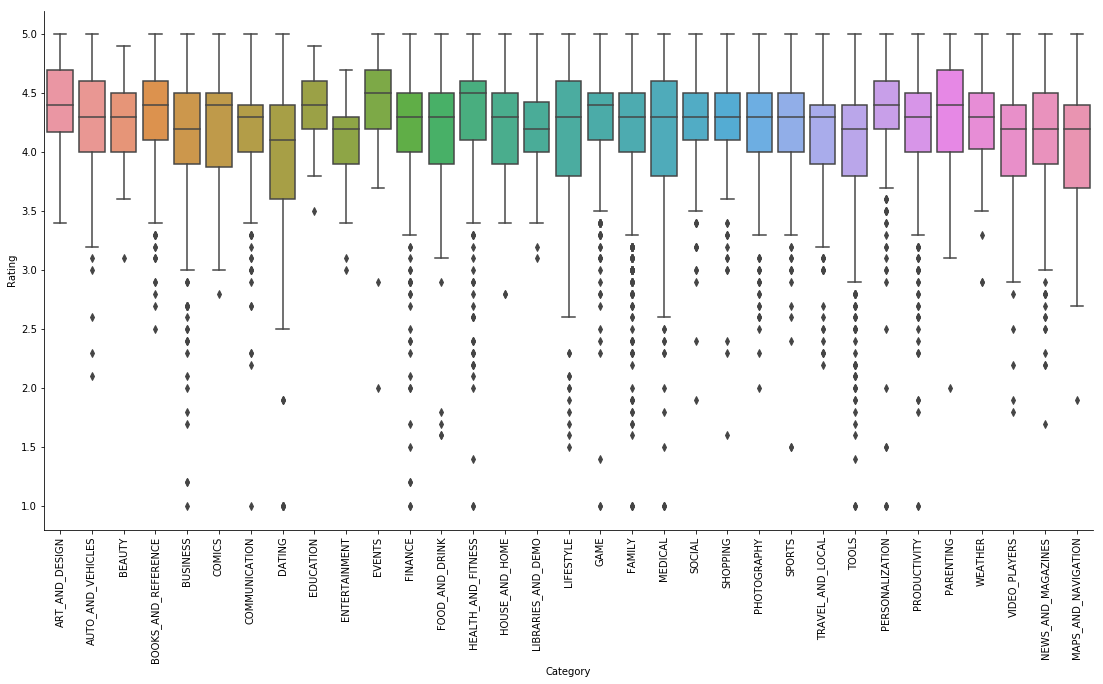

In [37]:
sns.catplot(x="Category",y="Rating",kind='box',data=playstore, height=8, aspect=2/1);
plt.xticks(rotation=90);

Average rating accross the category is around 4.2. But are the same across the category.



In [38]:
model_name = ols('Rating ~ C(Category)', data=playstore).fit()


In [39]:
model_name.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     8.531
Date:                Mon, 25 Feb 2019   Prob (F-statistic):           1.85e-39
Time:                        11:41:11   Log-Likelihood:                -8684.4
No. Observations:               10829   AIC:                         1.743e+04
Df Residuals:                   10796   BIC:                         1.768e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                              4.4016      0.068     65.161      0.000       4.269       4.534
C(Category)[T.AUTO_AND_VEHICLES]      -0.2039      0.089     -2.280      0.023      -0.379      -0.029
C(Category)[T.BEAUTY]                 -0.1393      0.100     -1.388      0.165      -0.336       0.057
C(Category)[T.BOOKS_AND_REFERENCE]    -0.0985      0.076     -1.290      0.197      -0.248       0.051
C(Category)[T.BUSINESS]               -0.2674      0.072     -3.709      0.000      -0.409      -0.126
C(Category)[T.COMICS]                 -0.2349      0.097     -2.419      0.016      -0.425      -0.045
C(Category)[T.COMMUNICATION]          -0.2354      0.073     -3.228      0.001      -0.378      -0.092
C(Category)[T.DATING]                 -0.4870      0.076     -6.389      0.000      -0.636      -0.338
C(Category)[T.EDUCATION]              -0.0105      0.080     -0.131      0.895      -0.168       0.147
C(Category)[T.ENTERTAINMENT]          -0.2754      0.081     -3.410      0.001      -0.434      -0.117
C(Category)[T.EVENTS]                 -0.0016      0.096     -0.016      0.987      -0.189       0.186
C(Category)[T.FAMILY]                 -0.2017      0.069     -2.938      0.003      -0.336      -0.067
C(Category)[T.FINANCE]                -0.2393      0.073     -3.268      0.001      -0.383      -0.096
C(Category)[T.FOOD_AND_DRINK]         -0.2527      0.083     -3.051      0.002      -0.415      -0.090
C(Category)[T.GAME]                   -0.1194      0.069     -1.720      0.085      -0.255       0.017
C(Category)[T.HEALTH_AND_FITNESS]     -0.1426      0.074     -1.937      0.053      -0.287       0.002
C(Category)[T.HOUSE_AND_HOME]         -0.2266      0.089     -2.552      0.011      -0.401      -0.053
C(Category)[T.LIBRARIES_AND_DEMO]     -0.2051      0.090     -2.288      0.022      -0.381      -0.029
C(Category)[T.LIFESTYLE]              -0.2767      0.073     -3.791      0.000      -0.420      -0.134
C(Category)[T.MAPS_AND_NAVIGATION]    -0.3410      0.082     -4.167      0.000      -0.501      -0.181
C(Category)[T.MEDICAL]                -0.2042      0.072     -2.833      0.005      -0.345      -0.063
C(Category)[T.NEWS_AND_MAGAZINES]     -0.2850      0.075     -3.810      0.000      -0.432      -0.138
C(Category)[T.PARENTING]              -0.1066      0.097     -1.097      0.273      -0.297       0.084
C(Category)[T.PERSONALIZATION]        -0.1052      0.073     -1.443      0.149      -0.248       0.038
C(Category)[T.PHOTOGRAPHY]            -0.2251      0.074     -3.054      0.002      -0.370      -0.081
C(Category)[T.PRODUCTIVITY]           -0.2044      0.072     -2.820      0.005      -0.346      -0.062
C(Category)[T.SHOPPING]               -0.1446      0.075     -1.918      0.055      -0.292      

By looking the F-statistic and P valuse we can say rating is significantly diferent accross the category.



### Installation by category

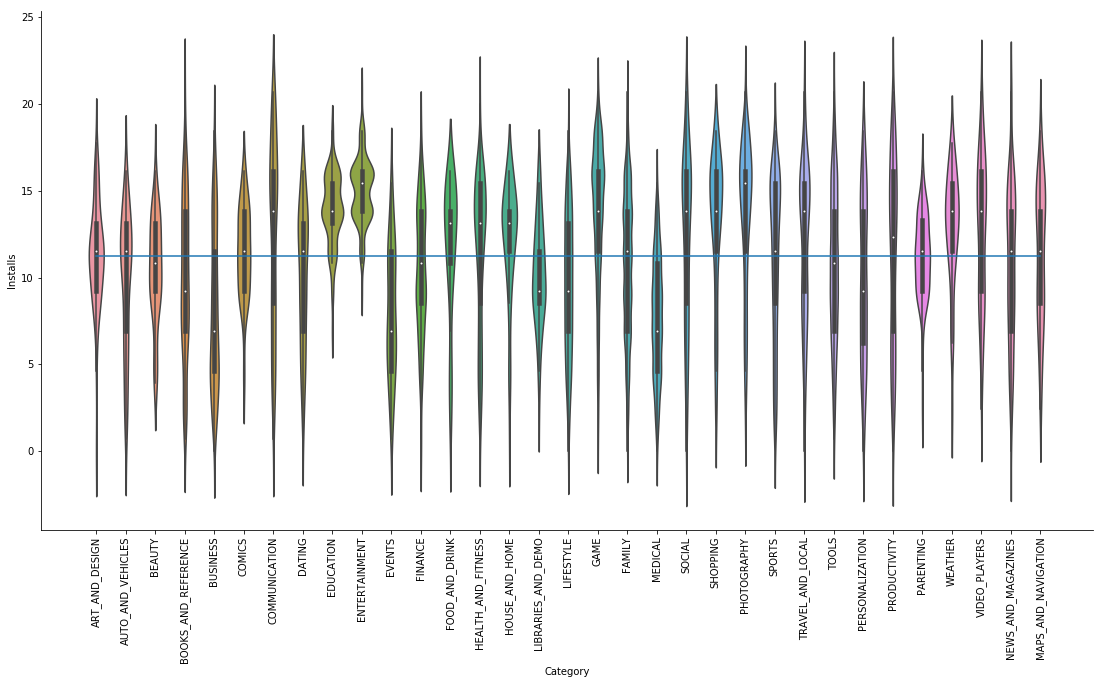

In [41]:
sns.catplot(x="Category",y="Installs",kind='violin',data=playstore, height=8, aspect=2/1);
sns.lineplot(x=range(0,len(playstore.Category.unique())),y=playstore["Installs"].mean(),)
plt.xticks(rotation=90);

By looking the above graph we can see that Education, Entertanments,Game ,Shopping,Social and weather are the most downlaod app. Where as Business , Events and medical are the least downloaded app.


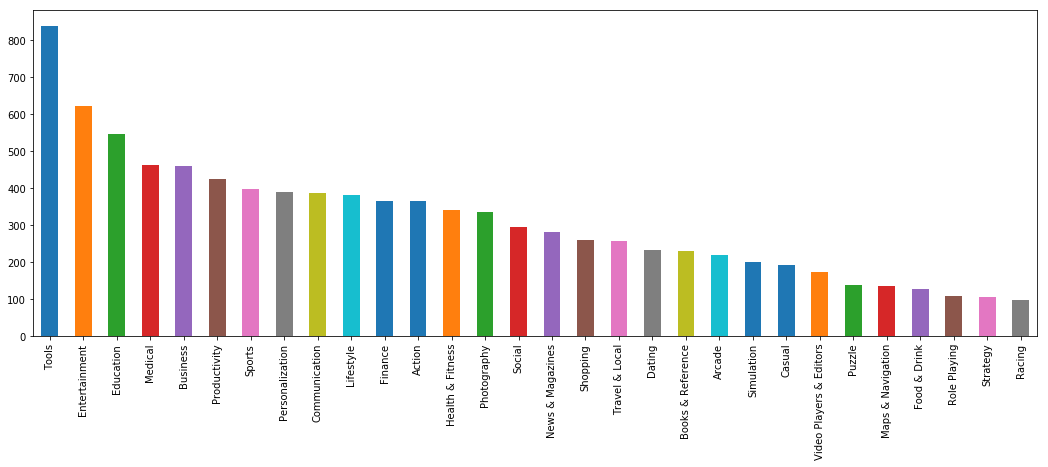

In [43]:
playstore.Genres.value_counts().head(30).plot("bar",figsize=(18,6))

By looking the above graph we found that Apps are well destributed among top 20 Genres


### Relationship Between rating and reviews

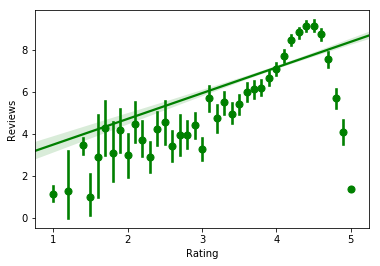

In [44]:
sns.regplot(playstore.Rating,playstore.Reviews,color="g",x_estimator=np.mean);

We found that ratings and reviews have positive correlation

### App Reviews

In [46]:
app_reviews= pd.read_csv(r"C:\Users\andee\googleplaystore_user_reviews.csv")



In [47]:
app_reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [48]:
app_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
App                       64295 non-null object
Translated_Review         37427 non-null object
Sentiment                 37432 non-null object
Sentiment_Polarity        37432 non-null float64
Sentiment_Subjectivity    37432 non-null float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [49]:
#There a lot of null values across all the columns. Lets remove them

app_reviews.isnull().sum().sort_values()

App                           0
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
Translated_Review         26868
dtype: int64

In [50]:
app_reviews.dropna(inplace=True)
app_reviews.isnull().sum().sort_values()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [51]:
app_reviews.Sentiment.value_counts()

Positive    23998
Negative     8271
Neutral      5158
Name: Sentiment, dtype: int64

There are almost 3 time positive review than negative.

## Joining app data with app reviews¶


In [52]:
combined_data= playstore[["App","Type","Category","Genres","Content_Rating"]].merge(app_reviews,how="inner",left_on="App",right_on="App")


In [54]:
combined_data.head()                                                                

,App,Type,Category,Genres,Content_Rating,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,Free,ART_AND_DESIGN,Art & Design;Pretend Play,Everyone,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,Free,ART_AND_DESIGN,Art & Design;Pretend Play,Everyone,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,Free,ART_AND_DESIGN,Art & Design;Pretend Play,Everyone,like,Neutral,0.000,0.000000
3,Coloring book moana,Free,ART_AND_DESIGN,Art & Design;Pretend Play,Everyone,I love colors inspyering,Positive,0.500,0.600000
4,Coloring book moana,Free,ART_AND_DESIGN,Art & Design;Pretend Play,Everyone,I hate,Negative,-0.800,0.900000


## Free app Vs Paid app Reviews


### Lets start with comparing sentimets for paid and free apps


In [56]:
temp_type=(combined_data.groupby(["Type","Sentiment"])["App"].count()/combined_data.groupby(
    ["Type"])["App"].count()).reset_index(level=[0,1])

greenBars= temp_type[temp_type.Sentiment=='Positive']["App"]
orangeBars = temp_type[temp_type.Sentiment=='Negative']["App"]
blueBars = temp_type[temp_type.Sentiment=='Neutral']["App"]
r= list(range(0,len(temp_type.Type.unique())))

In [57]:
barWidth = 0.85
names = temp_type.Type.unique()

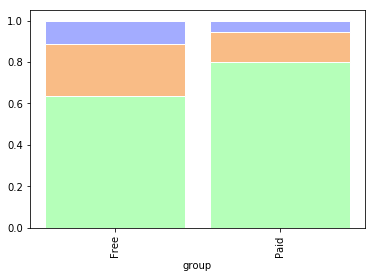

In [60]:
# Create green Bars
plt.bar(r, greenBars, color='#b5ffb9', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='white', width=barWidth)
# Create blue Bars
plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='white', width=barWidth)
# Custom x axis
plt.xticks(r, names,rotation=90)
plt.xlabel("group")
#plt.legend() 
# Show graphic
plt.show()

We found that
1. Paid apps have high number of positive reviews 80% and very less neutral reviews.

2. Free Apps have just about 60% of positive reviews with almost 10% of neutral reviews.


### lets check category wise for paid and free app separatly


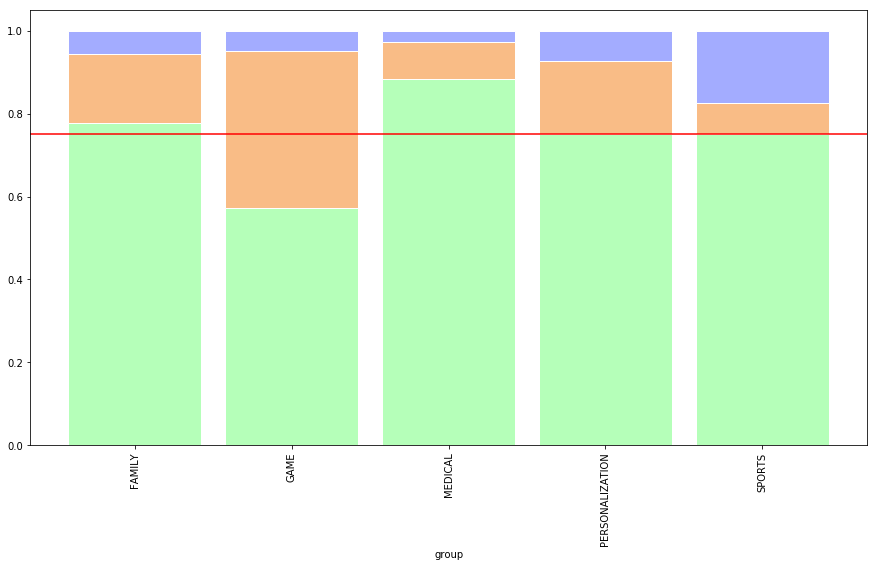

In [62]:
#Analysis of sentimats by category for paid apps
temp_cat_paid=(combined_data[combined_data.Type=="Paid"].groupby(["Category","Sentiment"])["App"].count()/combined_data[combined_data.Type=="Paid"].groupby(
    ["Category"])["App"].count()).reset_index(level=[0,1])

greenBars= temp_cat_paid[temp_cat_paid.Sentiment=='Positive']["App"]
orangeBars = temp_cat_paid[temp_cat_paid.Sentiment=='Negative']["App"]
blueBars = temp_cat_paid[temp_cat_paid.Sentiment=='Neutral']["App"]
plt.figure(figsize=(15,8))

r= list(range(0,len(temp_cat_paid.Category.unique())))

barWidth = 0.85
names = temp_cat_paid.Category.unique()
# Create green Bars
plt.bar(r, greenBars, color='#b5ffb9', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='white', width=barWidth)
# Create blue Bars
plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], 
        color='#a3acff', edgecolor='white', width=barWidth)
plt.axhline(y=.75,color='r', linestyle='-')
# Custom x axis
plt.xticks(r, names,rotation=90)
plt.xlabel("group")
#plt.legend() 
# Show graphic
plt.show()

Findings:

    1- Most of the paid medial app have positive reviews.
    
    2- Most of the paid app category have about 80% positive reviews except Game.
    
    3- Game have below 60% positive reviews with almost 40% negative reviews.

### Analysis of sentimats by category for Free apps



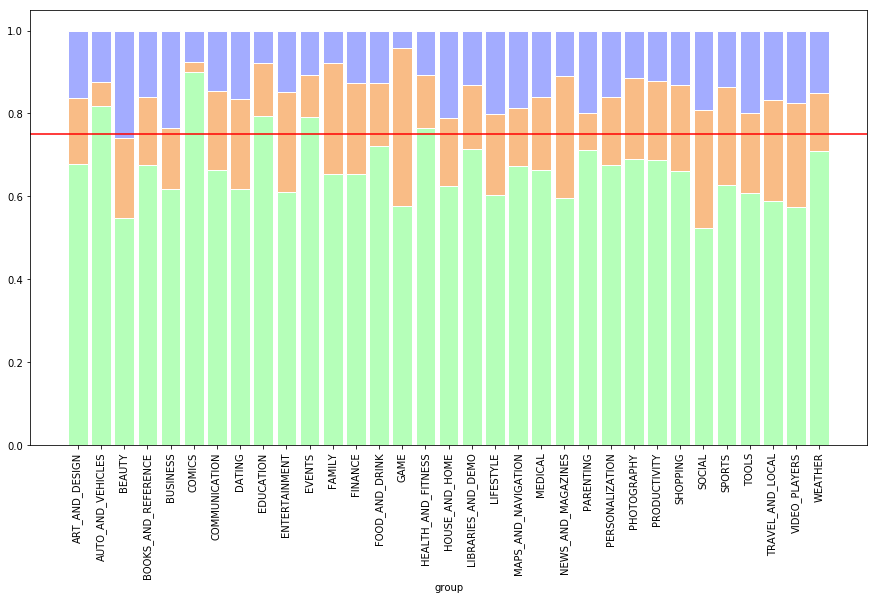

In [64]:
temp_cat_free=(combined_data[combined_data.Type=="Free"].groupby(["Category","Sentiment"])["App"].count()/combined_data[combined_data.Type=="Free"].groupby(
    ["Category"])["App"].count()).reset_index(level=[0,1])

greenBars= temp_cat_free[temp_cat_free.Sentiment=='Positive']["App"]
orangeBars = temp_cat_free[temp_cat_free.Sentiment=='Negative']["App"]
blueBars = temp_cat_free[temp_cat_free.Sentiment=='Neutral']["App"]

plt.figure(figsize=(15,8))

r= list(range(0,len(temp_cat_free.Category.unique())))

barWidth = 0.85
names = temp_cat_free.Category.unique()
# Create green Bars
plt.bar(r, greenBars, color='#b5ffb9', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='white', width=barWidth)
# Create blue Bars
plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], 
        color='#a3acff', edgecolor='white', width=barWidth)
plt.axhline(y=.75,color='r', linestyle='-')
# Custom x axis
plt.xticks(r, names,rotation=90)
plt.xlabel("group")
#plt.legend() 
# Show graphic
plt.show()

Findings:
    
    1- Average positive reviews are about 63% as compare to 80% for paid app
    
    2- Free apps have high numbers of neutral reviews 
    
    3- Free apps are more distrubuted across category 
    
    4- Free comics are very popular, with having 90% positive reviews

## Sentimet Polarity

### Free vs Paid


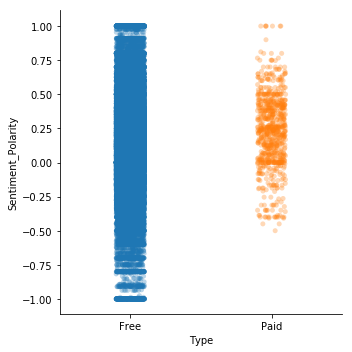

In [67]:
sns.catplot("Type","Sentiment_Polarity",data= combined_data,alpha=.3);

We found that:

    1- Most of the Paid apps have positive polarity
    
    2- Free apps have a lot of strong nagetive reviews

### Deep dive into free apps polarity



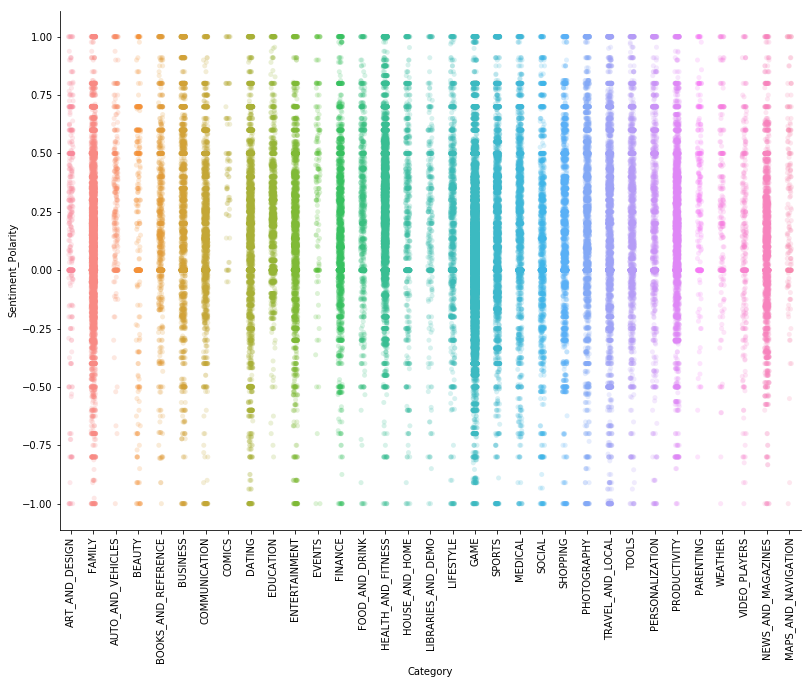

In [68]:
sns.catplot("Category","Sentiment_Polarity",data= 
            combined_data[combined_data.Type=="Free"],alpha=.2,height=8,aspect=1.5);
plt.xticks(rotation=90);

Based on the above graph:

    Category having strong Negative reviews are:
    
    1- Game
    
    2- Family
    
    3- Dating
    
    4- Entertainment
    
    5- Traivels and Local